In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('ESSdata_Thinkful.csv.txt')

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [6]:
df.shape

(8594, 13)

In [7]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [8]:
df.isnull().sum().sort_values(ascending=False).head(20)

agea       239
sclact      94
pplfair     39
happy       31
pplhlp      25
partner     17
sclmeet     15
ppltrst     14
gndr        10
tvtot        8
year         0
idno         0
cntry        0
dtype: int64

In [10]:
df = df.fillna(df.median())

In [11]:
df.isnull().sum().sort_values(ascending=False).head(20)

partner    0
agea       0
gndr       0
sclact     0
sclmeet    0
happy      0
pplhlp     0
pplfair    0
ppltrst    0
tvtot      0
year       0
idno       0
cntry      0
dtype: int64

In [12]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'TRUST PER COUNTRY 2012 VS 2014')

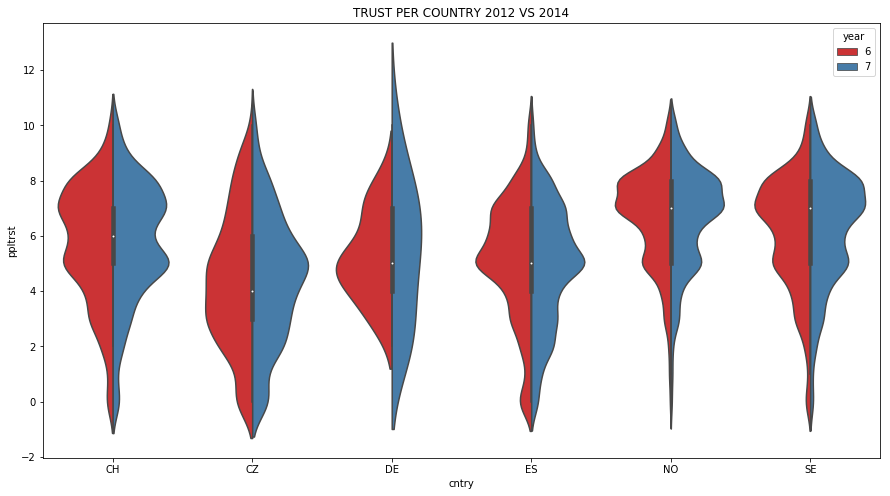

In [14]:
# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
plt.figure(figsize=(15,8))
sns.violinplot(x='cntry', y='ppltrst', hue='year', data=df, split=True, palette='Set1')
plt.title('TRUST PER COUNTRY 2012 VS 2014')

In [48]:
df2012 = df.where(df['year'] == 6).dropna()
df2014 = df.where(df['year'] == 7).dropna()

In [49]:
df2012.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6.0,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6.0,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6.0,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6.0,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6.0,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [50]:
df2012.shape

(4297, 13)

In [51]:
df2014.shape

(4297, 13)

In [53]:
print(np.mean(df2012['ppltrst']))
print(np.mean(df2014['ppltrst']))

5.564114498487316
5.557132883407029


No, people did not become more trusting. Trust remained flat. 

In [54]:
# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

print(np.mean(df2012['happy']))
print(np.mean(df2014['happy']))

7.72492436583663
7.6665115196648825


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'TRUST PER COUNTRY 2012 VS 2014')

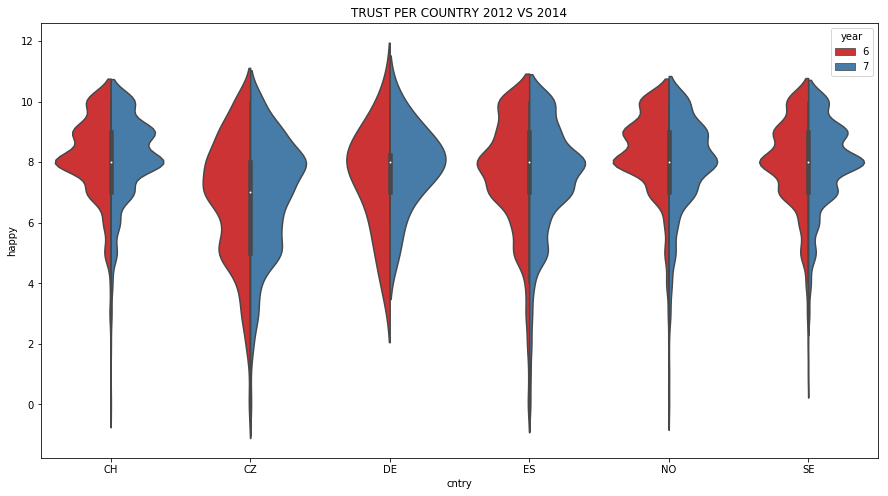

In [55]:
plt.figure(figsize=(15,8))
sns.violinplot(x='cntry', y='happy', hue='year', data=df, split=True, palette='Set1')
plt.title('HAPPINESS PER COUNTRY 2012 VS 2014')

No, happiness is flat as well.

In [56]:
# Who reported watching more TV in 2012, men or women?

dfm = df.where(df['gndr'] == 2).dropna()
dff = df.where(df['gndr'] == 1).dropna()

In [57]:
dfm.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6.0,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6.0,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
3,CH,28.0,6.0,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6.0,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
5,CH,36.0,6.0,4.0,6.0,7.0,3.0,8.0,7.0,4.0,2.0,47.0,2.0


In [58]:
dfm.shape

(4268, 13)

In [59]:
print(np.mean(dfm['tvtot']))
print(np.mean(dff['tvtot']))

3.8926897844423616
3.8319463707813224


Men watched marginally more television than women.

In [64]:
# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
# 2 == lives alone
dfpart2012 = df.where(df2012['partner'] == 1).dropna()
dfalone2012 = df.where(df2012['partner'] == 2).dropna()

In [65]:
print(np.mean(dfpart2012['pplfair']))
print(np.mean(dfalone2012['pplfair']))

6.082431928384931
5.857673267326732


People living with a partner in 2012 were slightly more likely to believe people are fair.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'LIKELINESS TO MEET SOCIALLY IN 2014 PER COUNTRY')

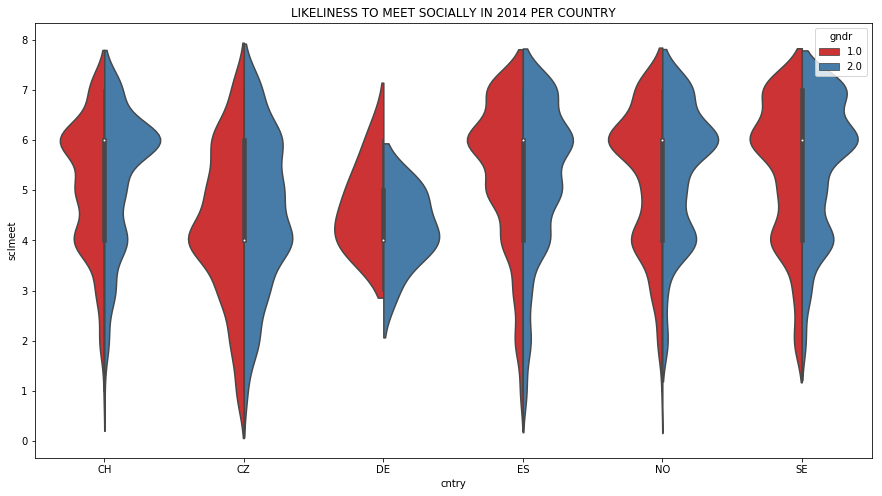

In [68]:
# Pick three or four of the countries in the sample and compare how often people met socially in 2014. 
# Are there differences, and if so, which countries stand out?

plt.figure(figsize=(15,8))
sns.violinplot(x='cntry', y='sclmeet', hue='gndr', data=df2014, split=True, palette='Set1')
plt.title('LIKELINESS TO MEET SOCIALLY IN 2014 PER COUNTRY')

Norway, Spain, and Sweden were more likely to meet socially than Denver, Czech Republic and China. Most are at least somewhat sociable.

In [80]:
df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [81]:
df2014CH = df2014.where(df2014['cntry'] == 'CH').dropna()
df2014DE = df2014.where(df2014['cntry'] == 'DE').dropna()
df2014NO = df2014.where(df2014['cntry'] == 'NO').dropna()

In [91]:
countries = ['CH', 'NO']
df6 = df2014.where(df2014['cntry'].isin(countries)).dropna()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'LIKELINESS TO PARTAKE IN SOCIAL ACTIVITIES BY AGE IN 2014')

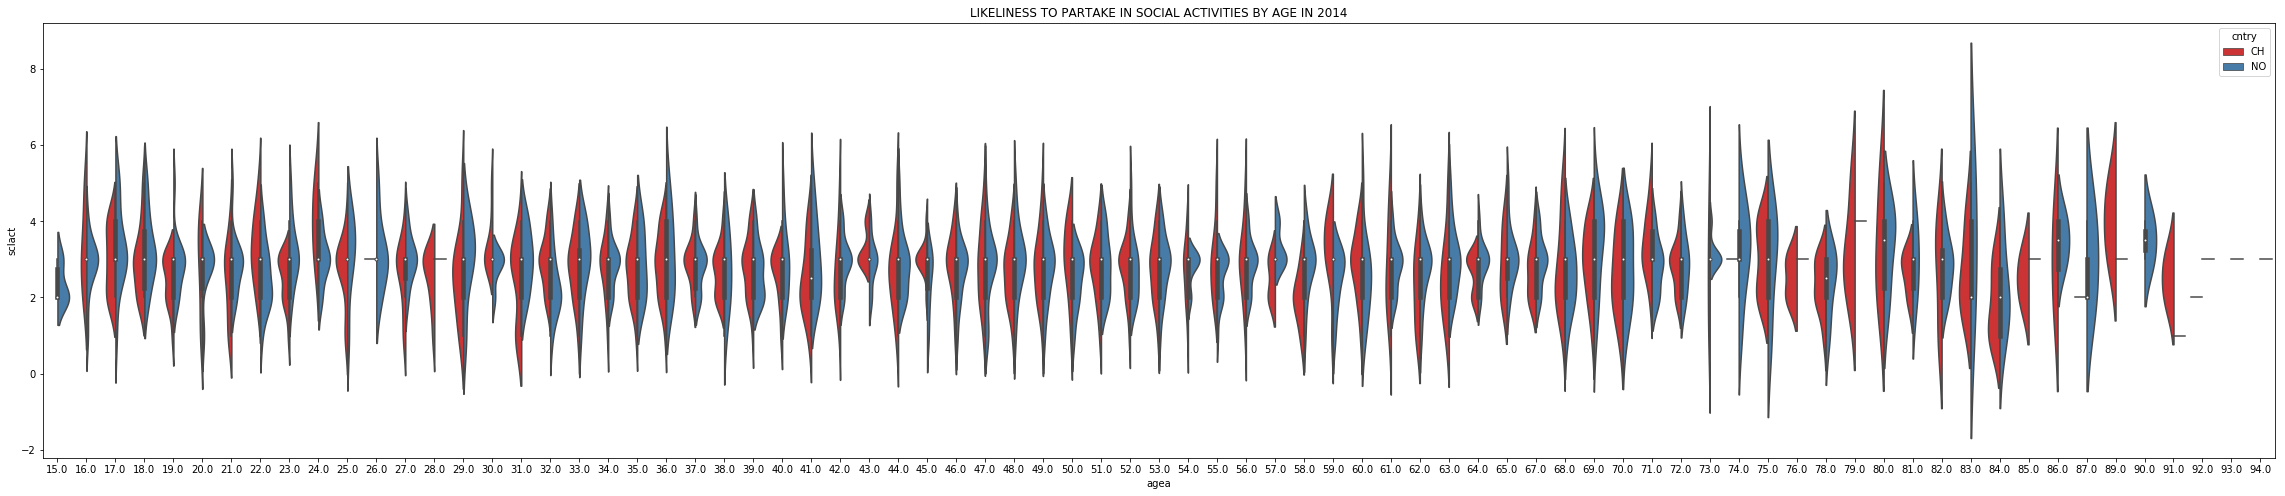

In [92]:
# Pick three or four of the countries in the sample and compare how often people took part in social activities, 
# relative to others their age, in 2014. 
# Are there differences, and if so, which countries stand out?

plt.figure(figsize=(40,8))
sns.violinplot(x='agea', y='sclact', hue='cntry', data=df6, split=True, palette='Set1')
plt.title('LIKELINESS TO PARTAKE IN SOCIAL ACTIVITIES BY AGE IN 2014')

In earnest, I see no reason significant difference in the likelihood to act socially. All ages have a bulge at the midpoint and taper off at the extremes. Outliers are almost certainly the result of low samples. 